# **TikTok Project**

## Logistic Regression Analysis

## Problem Summary
TikTok users have the ability to report videos and comments that contain user claims. These reports identify content that needs to be reviewed by moderators. This process generates a large number of user reports that are difficult to address quickly.

The goal is to build a machine learning model with the capability to reliably classify user interaction data as a claim or opinion.. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them moefficiently.ns.

## Project Goal

Using **hypothesis testing** we found that if a user is verified they are **5 times more likely to post an opinion as opposed to a claim**. We shall now use simple **logistic regression** and understand how video characteristics relate to verified users. Therefore, we conduct a logistic regression using verified status as the outcome variable. 

# **Build a regression model**

### **Task 1. Imports and loading**
Import the data and packages that are needed for building regression models.

In [89]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
# Load dataset into dataframe
df = pd.read_csv("tiktok_dataset.csv")

### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
df.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns

df.shape

(19382, 12)

Get the data types of the columns.

In [5]:
# Get data types of columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [6]:
# Generate basic descriptive stats

df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [7]:
# Check for missing values and clean
df = df.drop('#', axis = 1).copy()
df = df.dropna().copy()

df.head()



,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [8]:
df.shape

(19084, 11)

In [11]:
# Check for duplicates

df.duplicated().sum()

0

There is no duplicated data and the dataset has been cleaned


Check for and handle outliers.

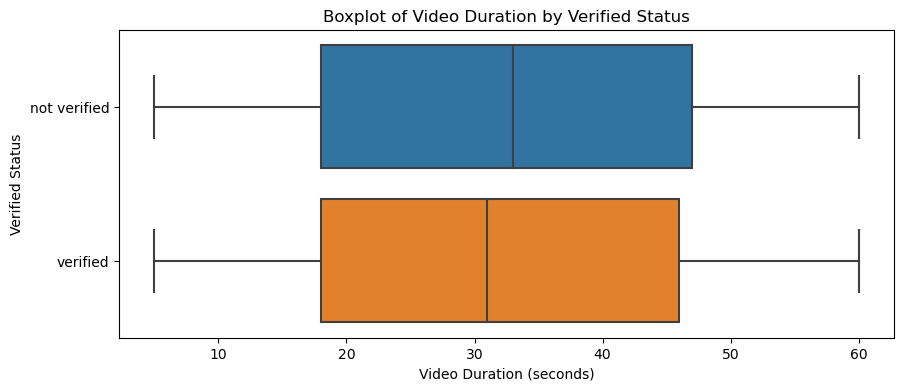

In [13]:
# Create a boxplot to visualize distribution of `video_duration_sec`

# Set the figure size
plt.figure(figsize=(10, 4))

# Create a boxplot
sns.boxplot(y='verified_status', x='video_duration_sec', data=df)

# Add title and labels
plt.title('Boxplot of Video Duration by Verified Status')
plt.ylabel('Verified Status')
plt.xlabel('Video Duration (seconds)')

# Show plot
plt.show()


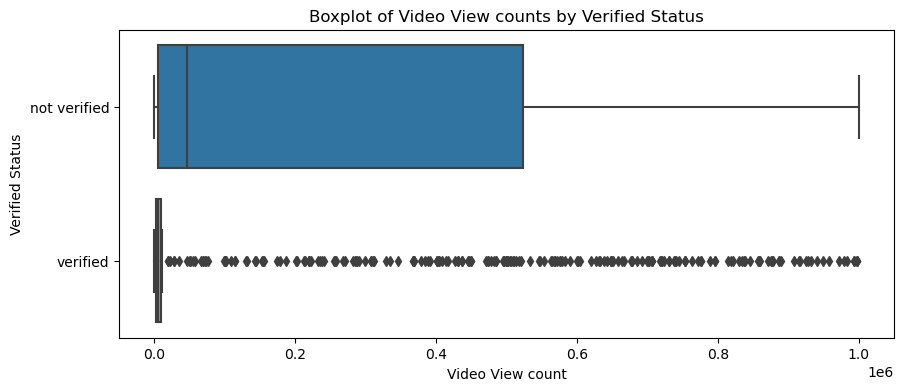

In [14]:
# Create a boxplot to visualize distribution of `video_view_count`
# Set the figure size
plt.figure(figsize=(10, 4))

# Create a boxplot
sns.boxplot(y='verified_status', x='video_view_count', data=df)

# Add title and labels
plt.title('Boxplot of Video View counts by Verified Status')
plt.ylabel('Verified Status')
plt.xlabel('Video View count')

# Show plot
plt.show()



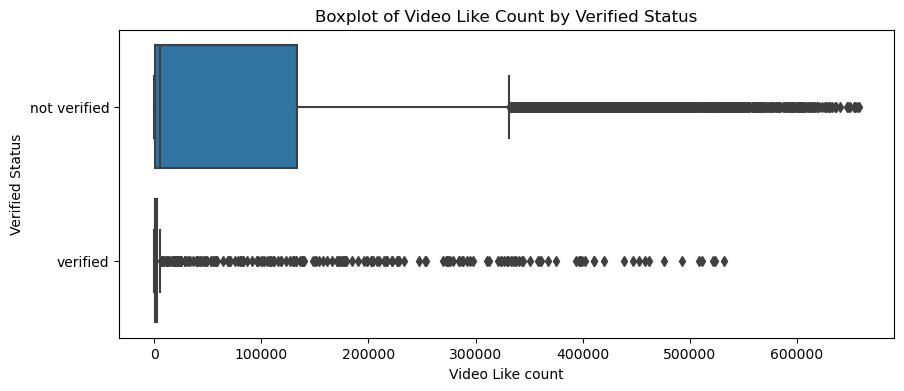

In [16]:
# Create a boxplot to visualize distribution of `video_like_count`
# Set the figure size
plt.figure(figsize=(10, 4))

# Create a boxplot
sns.boxplot(y='verified_status', x='video_like_count', data=df)

# Add title and labels
plt.title('Boxplot of Video Like Count by Verified Status')
plt.ylabel('Verified Status')
plt.xlabel('Video Like count')

# Show plot
plt.show()



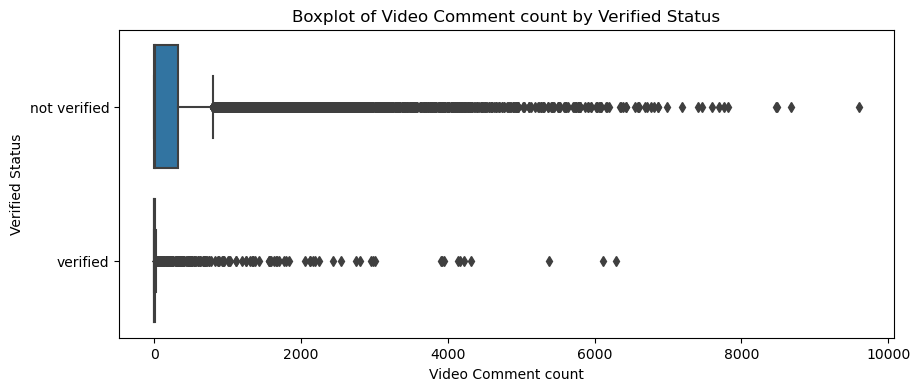

In [17]:
# Create a boxplot to visualize distribution of `video_comment_count`
# Set the figure size
plt.figure(figsize=(10, 4))

# Create a boxplot
sns.boxplot(y='verified_status', x='video_comment_count', data=df)

# Add title and labels
plt.title('Boxplot of Video Comment count by Verified Status')
plt.ylabel('Verified Status')
plt.xlabel('Video Comment count')

# Show plot
plt.show()



## Summary of the above plots

Between verified and not verified users 
1. Video duration is approximately the same between 15 and 45 seconds and this is due to tik tok policy oh having a maximum video duration of 60 seconds
2. Video view counts are vastly different with verified accounts having a vast proportion of videos beyond 200,000 views
3. The Like count shows a similar trend with verified accounts having likes uniformly beyond 100,000 but interestingly non verified accounts have many outliers beyond 300,000 which might be either spam bots or edgy click-baiting content posted by them
4. This also shows up in comment counts with non verified accounts having more than 1000 comments implying spam bots or fake reviews

Check class balance.

In [18]:
# Check class balance for video_comment_count

df['verified_status'].value_counts(normalize = True)*100

verified_status
not verified    93.71201
verified         6.28799
Name: proportion, dtype: float64

Approximately 93.7% of the dataset represents videos posted by unverified accounts and 6.3% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Use resampling to create class balance in the outcome variable, if needed.

In [63]:
# Use resampling to create class balance in the outcome variable, if needed

# Identify data points from majority and minority classes
df_major = df[df['verified_status'] == 'not verified']
df_minor = df[df['verified_status'] == 'verified']

# Upsample the minority class (which is "verified")

df_minor_upsample = resample(df_minor, replace = True, n_samples= len(df_major), random_state = 42)

# Combine majority class with upsampled minority class

df_new = pd.concat([df_major, df_minor_upsample], axis = 0).reset_index(drop = True)

# Display new class counts
df_new['verified_status'].value_counts(normalize = True)*100

verified_status
not verified    50.0
verified        50.0
Name: proportion, dtype: float64

In [64]:
df_new.head()

,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [65]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
df_new['text_length'] = df_new['video_transcription_text'].copy()
df_new['text_length'] = df_new['text_length'].apply(lambda x: len(x))


In [66]:
df_new.head()

,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

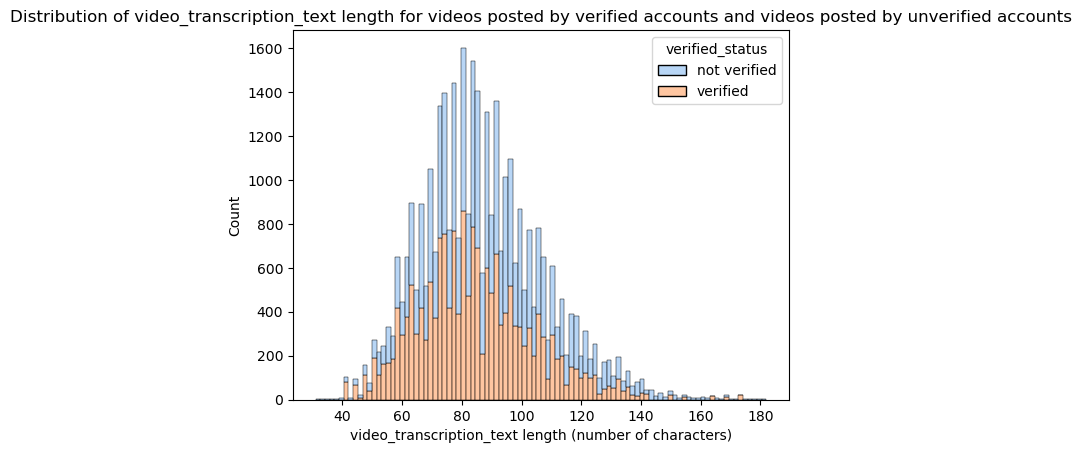

In [67]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
sns.histplot(data=df_new, stat="count", multiple="stack", x="text_length", kde=False, palette="pastel", 
             hue="verified_status", element="bars", legend=True)
plt.title("Seaborn Stacked Histogram")
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for videos posted by verified accounts and videos posted by unverified accounts")
plt.show()

In [68]:
df_new['text_length'].describe()

count    35768.000000
mean        86.982079
std         20.356201
min         31.000000
25%         73.000000
50%         85.000000
75%         99.000000
max        182.000000
Name: text_length, dtype: float64

We see that both follow a fairly normal distribution with the mean being around 87 characters. Tiktok has a character limit of *180* characters which is in agreement with the observation (NOTE now it has been reduced to 150)

### **Task 2b. Examine correlations**

Next, code a correlation matrix to help determine most correlated variables.

In [69]:
# Code a correlation matrix to help determine most correlated variables

corr_mat = df_new.corr(numeric_only = True)
corr_mat

,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
video_id,1.000000,0.013938,0.001607,0.005167,0.009136,0.006814,0.011346,-0.007634
video_duration_sec,0.013938,1.000000,0.013892,0.004610,0.001944,0.006930,-0.000664,-0.005043
video_view_count,0.001607,0.013892,1.000000,0.830843,0.710466,0.691557,0.585626,0.246867
video_like_count,0.005167,0.004610,0.830843,1.000000,0.851262,0.828637,0.707283,0.204647
video_share_count,0.009136,0.001944,0.710466,0.851262,1.000000,0.709738,0.621048,0.176362
video_download_count,0.006814,0.006930,0.691557,0.828637,0.709738,1.000000,0.852601,0.175287
video_comment_count,0.011346,-0.000664,0.585626,0.707283,0.621048,0.852601,1.000000,0.154423
text_length,-0.007634,-0.005043,0.246867,0.204647,0.176362,0.175287,0.154423,1.000000


Visualize a correlation heatmap of the data.

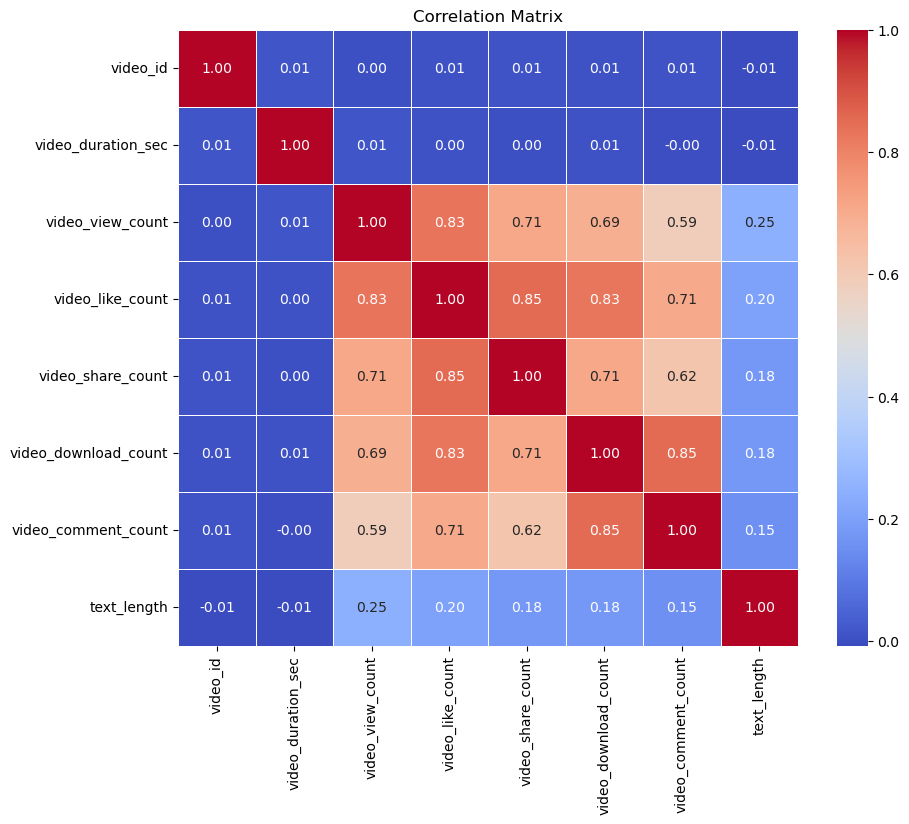

In [70]:
# Create a heatmap to visualize how correlated variables are
# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set the title and display the plot
plt.title('Correlation Matrix')
plt.show()


One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

video_view_count and video_like_count(0.83) as well as video_like_count and video_share_count(0.85) are positively correlated. To avoid highly correlated features we could keep the video features: view_count, share_count, download_count and comment_count 

### **Task 3a. Select variables**

Set your Y and X variables.

Select the outcome variable.

In [71]:
# Select outcome variable
y = df_new['verified_status']

X = df_new.drop(['verified_status', 'video_id','text_length','video_like_count','video_transcription_text'], axis = 1).copy()

In [72]:
X.head()

,claim_status,video_duration_sec,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,claim,59,under review,343296.0,241.0,1.0,0.0
1,claim,32,active,140877.0,19034.0,1161.0,684.0
2,claim,31,active,902185.0,2858.0,833.0,329.0
3,claim,25,active,437506.0,34812.0,1234.0,584.0
4,claim,19,active,56167.0,4110.0,547.0,152.0


In [73]:
X.claim_status.value_counts()

claim_status
opinion    23367
claim      12401
Name: count, dtype: int64

In [74]:
y.head()

0    not verified
1    not verified
2    not verified
3    not verified
4    not verified
Name: verified_status, dtype: object

Select the features.

In [75]:
## One Hot encoding of features to get numerical results
X = pd.get_dummies(X, drop_first = True)
X = X.astype(int)
X.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,59,343296,241,1,0,0,0,1
1,32,140877,19034,1161,684,0,0,0
2,31,902185,2858,833,329,0,0,0
3,25,437506,34812,1234,584,0,0,0
4,19,56167,4110,547,152,0,0,0


In [76]:
X.claim_status_opinion.value_counts()

claim_status_opinion
1    23367
0    12401
Name: count, dtype: int64

In [77]:
y = y.map({'verified':1, 'not verified':0})

y.value_counts()

verified_status
0    17884
1    17884
Name: count, dtype: int64

### **Task 3b. Train-test split**

Split the data into training and testing sets.

In [78]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


Confirm that the dimensions of the training and testing sets are in alignment.

In [79]:
# Get shape of each training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((26826, 8), (8942, 8), (26826,), (8942,))

Check the data type of the outcome variable.

In [80]:
# Check data type of outcome variable
y.dtypes


dtype('int64')

In [81]:
# Get unique values of outcome variable
X.dtypes


video_duration_sec                int64
video_view_count                  int64
video_share_count                 int64
video_download_count              int64
video_comment_count               int64
claim_status_opinion              int64
author_ban_status_banned          int64
author_ban_status_under review    int64
dtype: object

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.

### **Task 3c. Model building**

Construct a model and fit it to the training set.

In [82]:
# Construct a logistic regression model and fit it to the training set
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train, y_train)


### **Taks 4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

In [95]:
y_pred = log_clf.predict(X_test)

In [100]:
# Define the mapping dictionary
map_r = {1: 'verified', 0: 'not verified'}

# Map numerical values to categorical labels
y_pred = np.vectorize(map_r.get)(y_pred)
y_test = np.vectorize(map_r.get)(y_test)

Display the predictions on the encoded testing set.

### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

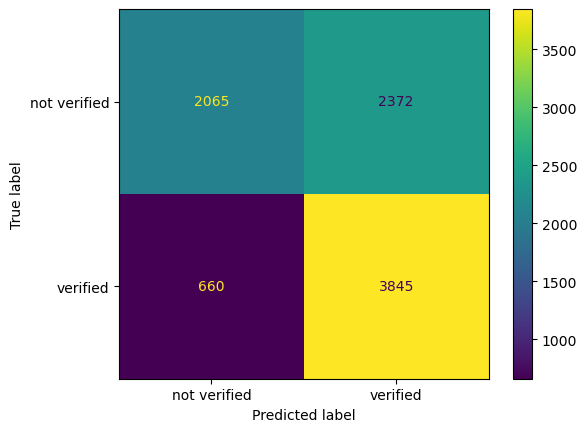

In [101]:
# Compute values for confusion matrix
# Specify the labels
labels = ['not verified', 'verified']

# Calculate confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=labels)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=labels)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [87]:
# Create a classification report
target_labels = ["verified", "not verified"]
print(classification_report(y_test, y_pred, target_names=target_labels))


              precision    recall  f1-score   support

    verified       0.76      0.47      0.58      4437
not verified       0.62      0.85      0.72      4505

    accuracy                           0.66      8942
   macro avg       0.69      0.66      0.65      8942
weighted avg       0.69      0.66      0.65      8942



In [90]:
# Metrics

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate and print precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate and print recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate and print F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Accuracy: 0.660925967345113
Precision: 0.6184654978285347
Recall: 0.853496115427303
F1-score: 0.7172169371385937


### **Task 4c. Interpret model coefficients**

In [91]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,0.008741
1,video_view_count,-0.000002
2,video_share_count,0.000006
3,video_download_count,-0.000211
4,video_comment_count,0.000321
5,claim_status_opinion,0.000369
6,author_ban_status_banned,-0.000014
7,author_ban_status_under review,-0.000004


### **Task 4d. Conclusion**

1. There are a large number of false positives as compared to false negatives which claims the users to be verified when they are not verified and hence we have a lower precision around **0.62** and compared to recall **0.85**
2. The simple LR model does a good job in identifying false negatives but still all the metrics are quite poor and **LR is not the best model**
3.  Based on the logistic regression model, each additional second of the video is associated with 0.009 increase in the log-odds of the user having a verified status or the odds of the user being verfied increases by 1.
4.  Other features do not seem to affect the verification status a lot as seen by their extremely small coefficients
